# Laboratory Work #3 "Using Pandas for Data Analysis"
## Executed by student of group KN-222b.e. Miniailo Dmytro

**Objective:** Gain basic skills in using pandas for data analysis

### Choosing variant

In [4]:
N = ord("D") % 5 + 1

print(N)

4


### Performing exercises

#### Libraries used in the tasks

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing data

In [9]:
df = pd.read_csv(r'NationalNames.csv')

#### 1. Output the first 8 rows of the dataset

In [11]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


#### 3. Get the names of dataset columns

In [13]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

#### 6. Calculate the number of unique female and male names in whole dataset

In [15]:
df.groupby(['Gender'])[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


#### 7. Find 5 the most popular male names in 2010

In [17]:
df[(df['Gender'] == 'M') & (df['Year'] == 2010)].sort_values(by='Count', ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


#### 8. Find the most popular name based on the results of one year)

In [19]:
def most_popular_name(year):
    most_popular = df[(df['Year'] == year)].sort_values(by='Count', ascending=False).head(1)
    return most_popular['Name'].values[0]

In [20]:
print('The name is \'' + most_popular_name(1947) + '\' in ' + str(1947) + '\n')
for year in range(1950, 1956):
    print('The name is \'' + most_popular_name(year) + '\' in ' + str(year) + '\n')

The name is 'Linda' in 1947

The name is 'James' in 1950

The name is 'James' in 1951

The name is 'James' in 1952

The name is 'Robert' in 1953

The name is 'Michael' in 1954

The name is 'Michael' in 1955



#### 13. Find the year when the name “Jacob” was the most popular as a female name

In [22]:
df[(df['Gender'] == 'F') & (df['Name'] == 'Jacob')].sort_values(by='Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


#### 14. Find year, with the most number of gender neutral names

In [24]:
gender_neutral_df = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
gender_neutral_df = gender_neutral_df[gender_neutral_df['Gender'] > 1]

gender_neutral_counts = gender_neutral_df.groupby('Year').size().reset_index(name='Gender_neutral_names')
max_year = gender_neutral_counts.loc[gender_neutral_counts['Gender_neutral_names'].idxmax()]

result = pd.DataFrame({
    'Year': [max_year['Year']],
    'Gender_neutral_names': [max_year['Gender_neutral_names']]
})
result.set_index('Year', inplace=True)

result

,Gender_neutral_names
Year,
2008,2557


#### 15. Find total births per year

In [26]:
df.groupby(['Year']).agg({'Count':'sum'}).head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


#### 16. Find the year when the greatest number of children was born

In [28]:
print(df.groupby('Year')['Count'].sum().idxmax())

1957


#### 17. Find the number of girls and boys that were born in each year

In [30]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


#### 19. Draw the plot of total births per year of boys and girls

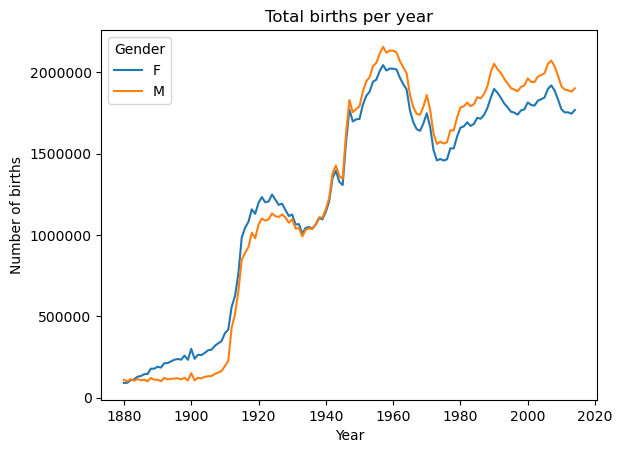

In [32]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().plot(kind='line', title='Total births per year')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### 20. Count number of gender neutral names (same for girls and boys)

In [34]:
df.groupby('Name')['Gender'].nunique().eq(2).sum()

10221

#### 22. Calculate how many years the observation was carried out

In [36]:
print('The observation was carried out for ' + str(df['Year'].nunique()) + ' years')

The observation was carried out for 135 years


#### 24. Find the most popular unpopular names (unpopular name that babies have been called the most times)

In [38]:
unpopular_names = df[df['Count'] < 6].groupby('Name')['Count'].sum()
most_popular_unpopular_name = unpopular_names.idxmax()
most_popular_unpopular_count = unpopular_names.max()

print(f'{most_popular_unpopular_name} is the most popular unpopular name. This name was given to babies {most_popular_unpopular_count} times.')

Celester is the most popular unpopular name. This name was given to babies 160 times.


#### 25. Plot graphs of the distribution of the number of names “John” and “Mary” by year regardless of gender

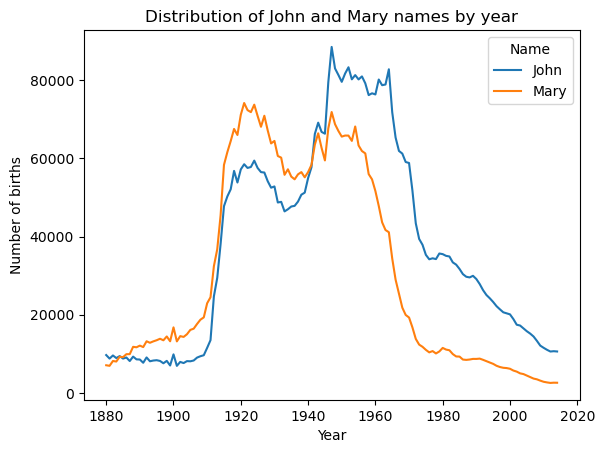

In [40]:
john_mary = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()

john_mary.plot(kind='line', title='Distribution of John and Mary names by year')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### 26. Plot graphs of the distribution of the number of female names “John” and male names “Mary” by year

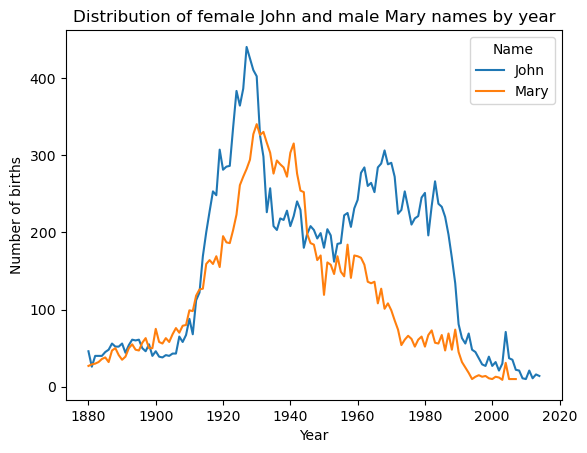

In [42]:
john_female_mary_male = df[((df['Name'] == 'John') & (df['Gender'] == 'F')) | ((df['Name'] == 'Mary') & (df['Gender'] == 'M'))].groupby(['Year', 'Name'])['Count'].sum().unstack()

john_female_mary_male.plot(kind='line', title='Distribution of female John and male Mary names by year')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### 27. Find the most popular names each year

In [44]:
df.loc[df.groupby(['Year'])['Count'].idxmax(), ['Year', 'Name', 'Count']]

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147


**Conclusion:** During this laboratory work, I was gaining skills of using pandas for data analysis and visualisation.